# Your First Neural Network

Let's create a neural network that can label fashion items.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Split off some validation data

To measure our Neural Networks performance we will need some validation data. The `train_test_split` helper from scikit-learn does this for us.

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

In [4]:
X_train.shape

(50000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_val.shape

(10000, 28, 28)

### One more thing

We need to convert the labels from integers (0, 1, 2, 3, ...) to  a one-hot encoding. The one-hot encoding for a problem with ten classes is a ten dimensional vector for each sample. For a sample in class 4 every entry is zero except for the fourth one. Let's check it out:

In [7]:
from keras import utils


num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [8]:
y_train[:5]

array([5, 0, 0, 1, 4], dtype=uint8)

In [9]:
y_train_[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [10]:
# let's make y_train the same as the others
y_train = utils.to_categorical(y_train, num_classes)

## Import Network Building Blocks

A neural network is a stack of functions that are applied to the input data in order. Let's import some building blocks and create our first neural network:

In [11]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten

In [12]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
h = Flatten()(x)

# all Keras Ops look like z = f(z) (like functional programming)
h = Dense(100)(h)
h = Activation('relu')(h)

h = Dense(100)(h)
h = Activation('relu')(h)

# we want to predict one of ten classes
h = Dense(10)(h)
y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(x, y)

## Visualise the model

We can plot the model as a graph. This requires `pydot` which is a bit tricky to setup (even though everyone uses it). We will see an alternative way of looking at the model in a moment. If installing `pyplot` doesn't just work don't spend time trying to debug it. You can sink days into this ... :-(

In [13]:
from keras.utils import plot_model

In [14]:
plot_model(net, to_file='basic-net.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [ ]:
from IPython.display import Image

Image(filename="basic-net.png")

In [15]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
__________

## Train the model

Time to train the model using stochastic gradient descent.

In [16]:
from keras.optimizers import SGD

# a way to use a different optimiser
sgd = SGD(lr=0.5)

batch_size = 64

In [17]:
net.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

## Tensorboard

This is an alternative way of visualising the network and lots of other statistics about the training process.

https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard

In [18]:
from keras.callbacks import TensorBoard

In [19]:
callbacks = [TensorBoard('fashion-tb',
                         histogram_freq=1,
                         write_grads=True,
                         write_graph=True,
                         batch_size=batch_size,
                         write_images=True,)
            ]

Instructions for updating:
Use the retry module or similar alternatives.


In [20]:
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  callbacks=callbacks,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 57us/step - loss: 0.5274 - acc: 0.8171 - val_loss: 0.4438 - val_acc: 0.8426
Epoch 2/20
50000/50000 [==============================] - 2s 49us/step - loss: 0.3815 - acc: 0.8625 - val_loss: 0.3660 - val_acc: 0.8676
Epoch 3/20
50000/50000 [==============================] - 3s 52us/step - loss: 0.3453 - acc: 0.8736 - val_loss: 0.3552 - val_acc: 0.8652
Epoch 4/20
50000/50000 [==============================] - 3s 50us/step - loss: 0.3192 - acc: 0.8836 - val_loss: 0.3470 - val_acc: 0.8757
Epoch 5/20
50000/50000 [==============================] - 3s 50us/step - loss: 0.3002 - acc: 0.8886 - val_loss: 0.3463 - val_acc: 0.8718
Epoch 6/20
50000/50000 [==============================] - 3s 50us/step - loss: 0.2867 - acc: 0.8941 - val_loss: 0.3240 - val_acc: 0.8787
Epoch 7/20
50000/50000 [==============================] - 3s 50us/step - loss: 0.2714 - acc: 0.8990 - val_loss: 0.3328 - val_acc

Now that we have trained our model we can make predictions and hope that they are better. The highest probability should be at the index that corresponds to the correct class.

In [21]:
net.predict(X_val[:5])

array([[2.07623606e-11, 1.11054796e-17, 1.73294007e-16, 4.91198726e-15,
        2.93793337e-13, 2.35333664e-09, 5.85441539e-16, 2.69761852e-10,
        1.00000000e+00, 2.47993442e-18],
       [9.18707485e-07, 7.70173178e-16, 4.69731025e-12, 9.79379745e-14,
        2.81663159e-09, 3.04540003e-13, 2.42390530e-09, 1.63089065e-13,
        9.99999046e-01, 2.51452873e-12],
       [4.61602839e-10, 3.76231121e-12, 5.89687668e-14, 2.73960491e-14,
        2.54595000e-12, 3.72057802e-05, 1.33031281e-12, 9.99962568e-01,
        3.16660088e-12, 2.23594867e-07],
       [1.61864315e-04, 8.83634073e-08, 1.06310919e-01, 1.72881503e-03,
        7.82286763e-01, 5.97001293e-09, 1.09197192e-01, 2.30765545e-06,
        3.11947952e-04, 1.01157084e-07],
       [1.25463515e-15, 4.54630355e-19, 7.61620733e-20, 1.93747851e-17,
        3.19263531e-15, 8.65770838e-17, 2.71701286e-18, 1.31319487e-11,
        1.00000000e+00, 1.77015624e-15]], dtype=float32)

In [22]:
y_val[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

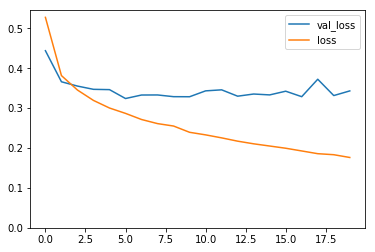

In [23]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, None])
plt.legend()